# Multiclass image classification

In [39]:
!pip install seaborn


     -------------------------------------- 293.3/293.3 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Activation
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import matplotlib.image as mpimg
import random
import sys
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### on va creer nos fonctions la 

In [2]:
def view_random_image(target_dir, target_class):
# le trajet du fichier 


    target_folder = target_dir+target_class


    # pour avoir une image d'une facon aleatoire

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # afficher l image en utilisant matplotlib 

    img = mpimg.imread(target_folder + "//" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    #afficher la taille du l image 

    print(f"Image shape: {img.shape}")

    return img

In [3]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    ##Returns separate loss curves for training and validation metrics.
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"])) # how many epochs did we run for?
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss") 
    plt.title("loss") 
    plt.xlabel("epochs") 
    plt.legend()
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy") 
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy") 
    plt.xlabel("epochs") 
    plt.legend(); 

In [21]:


def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Get the filesystem encoding
    fs_encoding = sys.getfilesystemencoding()

    # Read in target file (an image) using the filesystem encoding
    img = tf.io.read_file(filename, fs_encoding)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img / 255.
    return img


In [5]:
###faire une fonction qui predict notre class selon l image et l affiche

def pred_and_plot(model, filename, class_names):
    """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    print(len(pred[0]))
    print(tf.argmax(pred))

    # Get the predicted class
    if len(pred[0]) > 1:
    	pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False); 

In [6]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15, norm=False, savefig=False): 
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0] 

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # create enough axis slots for each class
           yticks=np.arange(n_classes), 
           xticklabels=labels,  # axes will be labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)

    # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

# Evaluate the model on test data
model2.evaluate(test_data)

# Plot confusion matrix for model predictions
pred_and_plot(model2, filename, class_names)

# Generate and save confusion matrix
make_confusion_matrix(y_true, y_pred, class_names, norm=True, savefig=True)
 



### on va specifier le chemin du dossier pour entrainer notre données

In [7]:
train_dir=r"C:\Users\belhaj ayoub\OneDrive\Escritorio\pfa\carfinder_2.0\train\\"
test_dir=r"C:\Users\belhaj ayoub\OneDrive\Escritorio\pfa\carfinder_2.0\test\\"

#### on va donner a chaque classe son nom (subdirectories) 

In [8]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
data_dir1 = pathlib.Path(test_dir)
class_names1 = np.array(sorted([item.name for item in data_dir1.glob('*')]))
print(class_names1)

['bus' 'cars' 'human' 'motorcycle']
['bus' 'cars' 'human' 'motorcycle']


['Acura_RLX_2016_60_19_310_35_6_74_57_196_20_FWD_5_4_4dr_mRD.jpg']
Image shape: (240, 320, 3)


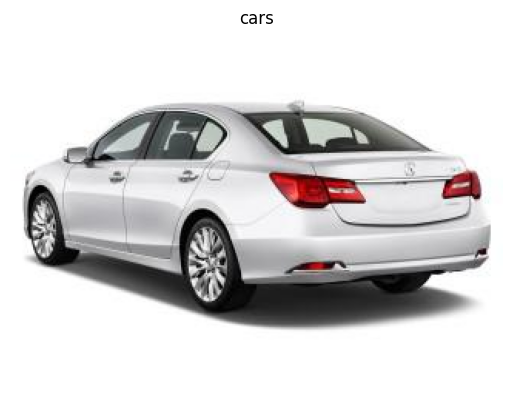

In [9]:

img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))


### preparer nos donnes  pour notre model (data cleaning/data resizing)
### turn pictures into tensors et les normaliser

In [10]:
#rescale / normaliser (les valeurs du pixels sont entre 0 et 255)

#train_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

#charger nos donnes 

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")


Found 20309 images belonging to 4 classes.
Found 9708 images belonging to 4 classes.


#### on import un model deja pret  

In [11]:
m1_model = tf.keras.applications.vgg16.VGG16()
print(type(m1_model))
#m1_model.summary()

    

<class 'keras.engine.functional.Functional'>


In [12]:
from tensorflow import keras
model2 = keras.models.Sequential()
for layer in m1_model.layers[0:-1]:
    model2.add(layer)

In [13]:
#model2.summary()

In [14]:
for layer in model2.layers:
    layer.trainable = False 
#model2.summary()    

In [15]:
model2.add(keras.layers.Dense(4))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [16]:
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=1e-3)
metrics = ["accuracy"]

model2.compile(optimizer=optim, loss=loss, metrics=metrics)

### on va creer notre modele la cnn (convolutional neural network ) 
#### maxpool2d prendre une matrice de caracrteristique et le transforme en scalaire
#### flatten This layer converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification

# we fit the model

In [17]:
history = model2.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
165/635 [======>.......................] - ETA: 33:02 - loss: 0.5356 - accuracy: 0.8212

C:\Users\belhaj ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


635/635 [==============================] - 3954s 6s/step - loss: 0.3677 - accuracy: 0.8755 - val_loss: 0.2514 - val_accuracy: 0.9208
Epoch 2/5
635/635 [==============================] - 3857s 6s/step - loss: 0.2669 - accuracy: 0.9107 - val_loss: 0.2133 - val_accuracy: 0.9318
Epoch 3/5
635/635 [==============================] - 4205s 7s/step - loss: 0.2430 - accuracy: 0.9172 - val_loss: 0.2105 - val_accuracy: 0.9294
Epoch 4/5
635/635 [==============================] - 4005s 6s/step - loss: 0.2191 - accuracy: 0.9241 - val_loss: 0.2115 - val_accuracy: 0.9327
Epoch 5/5
635/635 [==============================] - 4199s 7s/step - loss: 0.2320 - accuracy: 0.9203 - val_loss: 0.1674 - val_accuracy: 0.9461


In [31]:
model2.save("model2.model")

INFO:tensorflow:Assets written to: model2.model\assets


INFO:tensorflow:Assets written to: model2.model\assets


In [20]:
from tensorflow.keras.models import load_model
model1 = load_model('model2')

### on  evalue sur notre donnees du test

### on visualize la courbe du  loss 

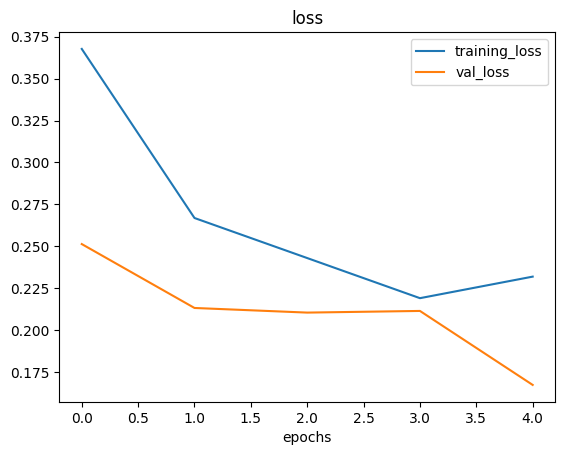

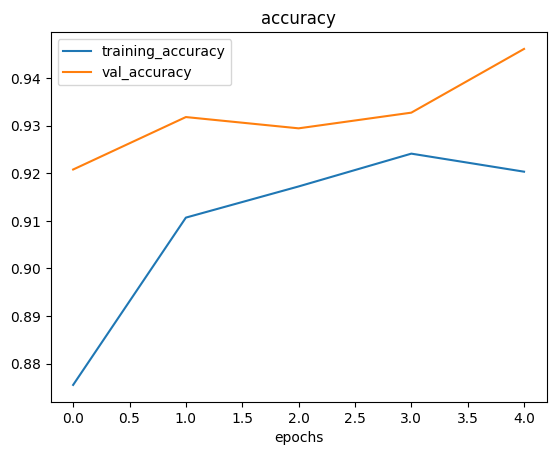

In [24]:
plot_loss_curves(history)

1/1 [==============================] - 1s 583ms/step
4
tf.Tensor([0 0 0 0], shape=(4,), dtype=int64)


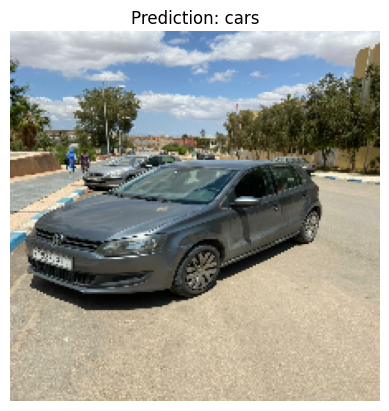

In [37]:
pred_and_plot(model=model2,
             filename = r"C:\Users\belhaj ayoub\OneDrive\Escritorio\pfa\bailal.jpg",
             class_names=class_names)

304/304 [==============================] - 2839s 9s/step


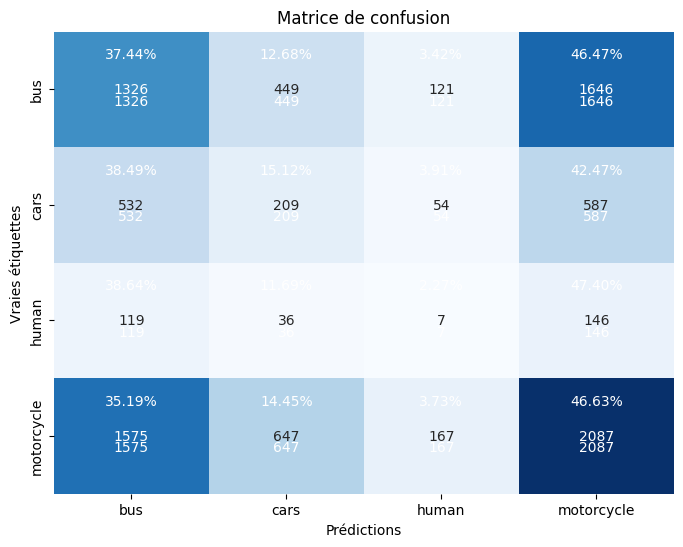

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtenir les prédictions du modèle sur les données de test
test_pred = model2.predict(test_data)
test_pred_classes = np.argmax(test_pred, axis=1)

# Obtenir les vraies étiquettes des données de test
test_true_classes = test_data.classes

# Calculer la matrice de confusion
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Calculer les pourcentages pour chaque classe
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Obtenir les noms de classe à partir des générateurs de données
class_names = list(test_data.class_indices.keys())

# Afficher la matrice de confusion sous forme de heatmap avec les nombres et les pourcentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

# Ajouter les nombres et les pourcentages dans les cellules de la matrice
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.6, cm[i, j], ha='center', va='center', color='white')
        plt.text(j + 0.5, i + 0.2, f"{cm_percent[i, j]*100:.2f}%", ha='center', va='center', color='white')

plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()


In [50]:
from collections import defaultdict

# Définir les classes et leur correspondance d'index
class_names = ['class1', 'class2', 'class3', 'class4']
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

# Initialiser un dictionnaire pour stocker les résultats par classe
class_results = defaultdict(lambda: {'total': 0, 'correct': 0})

# Obtenir les vraies étiquettes des données de test
test_true_classes = [class_names[idx] for idx in test_data.classes]

# Obtenir les prédictions du modèle sur les données de test
test_pred_probs = model2.predict(test_data)
test_pred_classes = np.argmax(test_pred_probs, axis=1)
test_pred_labels = [class_names[idx] for idx in test_pred_classes]

# Parcourir les vraies étiquettes et les prédictions pour compter les résultats par classe
for true_class, pred_label in zip(test_true_classes, test_pred_labels):
    class_results[true_class]['total'] += 1
    if true_class == pred_label:
        class_results[true_class]['correct'] += 1

# Afficher les résultats par classe
for class_name in class_names:
    total_predictions = class_results[class_name]['total']
    correct_predictions = class_results[class_name]['correct']
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    print(f"Classe : {class_name}")
    print(f"Nombre total de prédictions : {total_predictions}")
    print(f"Nombre total de prédictions correctes : {correct_predictions}")
    print(f"Précision : {accuracy * 100:.2f}%")
    print()


170/304 [===============>..............] - ETA: 15:09

C:\Users\belhaj ayoub\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


304/304 [==============================] - 2104s 7s/step
Classe : class1
Nombre total de prédictions : 3542
Nombre total de prédictions correctes : 1311
Précision : 37.01%

Classe : class2
Nombre total de prédictions : 1382
Nombre total de prédictions correctes : 180
Précision : 13.02%

Classe : class3
Nombre total de prédictions : 308
Nombre total de prédictions correctes : 11
Précision : 3.57%

Classe : class4
Nombre total de prédictions : 4476
Nombre total de prédictions correctes : 2090
Précision : 46.69%

